In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download historical BTC-USD data
btc = yf.download("BTC-USD", start="2015-01-01", end="2025-01-01", interval="1d")

# Optional: Reset index if you want 'Date' as a column
btc.reset_index(inplace=True)

# Flatten the multi-index columns
btc.columns = btc.columns.droplevel(1)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
btc['log-return'] = np.log(btc['Close']).diff()

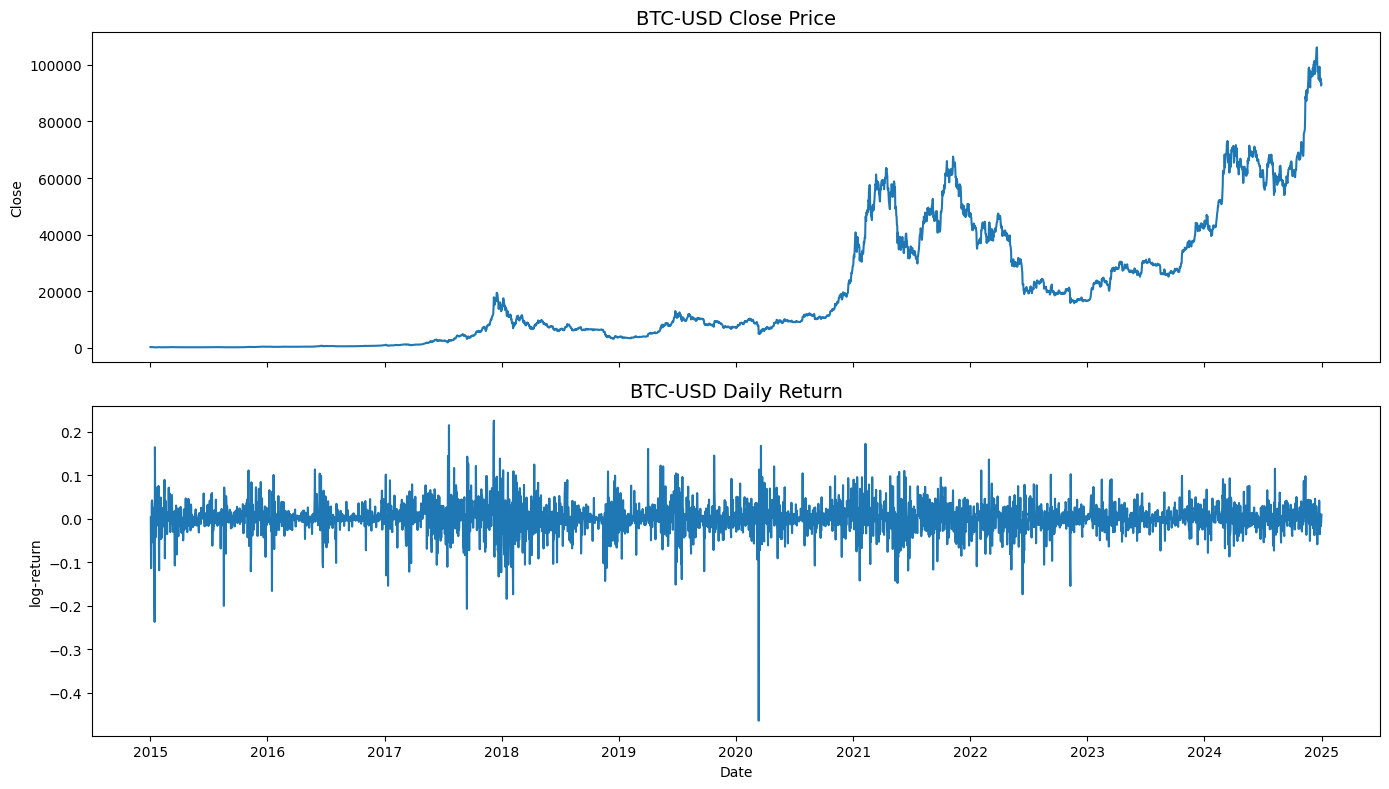

In [4]:
# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Plot Close Price
sns.lineplot(data=btc, x="Date", y="Close", ax=ax[0])
ax[0].set_title("BTC-USD Close Price", fontsize=14)

# Plot Return
sns.lineplot(data=btc, x="Date", y="log-return", ax=ax[1])
ax[1].set_title("BTC-USD Daily Return", fontsize=14)

plt.tight_layout()
plt.show()

In [5]:
# Parameters
initial_capital = 100_000
floor_percentage = 0.80  # floor = 80% of initial capital

risk_free_rate_annual = 0.05  # 2% annual risk-free rate
days = 365  # 1 years
rebalance_frequency = 7  # rebalance every 30 days

In [6]:
btc_ret = btc['log-return'].dropna()

In [7]:
# Parllel Worlds with Bootstrapping
m = 100000 # number of paths
t = 365 # investing time
rearrange_return = np.random.choice(btc_ret, size=(m, days), replace=True)
# btc_log_returns = np.exp(np.cumsum(rearrange_return, axis=1))

In [8]:
# risk_free_daily_rate = (1 + risk_free_rate_annual) ** (1/days) - 1
safe_growth = (1 + risk_free_rate_annual) ** (1/days)

In [9]:
safe_growth, safe_growth ** 365

(1.0001336806171135, 1.0500000000000214)

In [10]:
multiplier = 3
portfolio_value = np.ones(m) * 265
floor_value = portfolio_value * floor_percentage
cushion = portfolio_value - floor_value

In [11]:
risky_allocation = multiplier * cushion
risky_allocation

array([159., 159., 159., ..., 159., 159., 159.], shape=(100000,))

In [12]:
safe_allocation = portfolio_value - risky_allocation
safe_allocation

array([106., 106., 106., ..., 106., 106., 106.], shape=(100000,))

In [13]:
for i in range(t):
    if (i + 1) % 7 == 0:
        portfolio_value = risky_allocation + safe_allocation

        floor_value = portfolio_value * floor_percentage
        cushion = portfolio_value - floor_value

        risky_allocation = multiplier * cushion

        safe_allocation = portfolio_value - risky_allocation

    rets = np.exp(rearrange_return[:, i])
    risky_allocation = risky_allocation * rets
    safe_allocation = safe_allocation * safe_growth

In [14]:
portfolio_value

array([365.68935142, 376.2677681 , 283.96800956, ..., 268.23058272,
       623.66671084, 646.35671562], shape=(100000,))